In [35]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load in the fields

In [36]:
# contains the simulation's native fields 
sim_path = "../../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

# dimensions of each tf-derived field
shape = [1, 20, 20]
# string representing the subsection's dimensions, e.g. '4x4x4'
dims_str = str(shape[0]) + 'x' + str(shape[1]) + 'x' + str(shape[2])

# the fields computed by lya_fields.py
tf_path = "results/tf_fields" + dims_str + ".h5"

h5_sim = h5py.File(sim_path,'r')
h5_tf = h5py.File(tf_path,'r')

In [37]:
h5_tf.keys()

<KeysViewHDF5 ['nhi', 'tau_real', 'tau_red']>

In [38]:
# testing slice
x = np.arange(12).reshape(2,3,2)
inds = (0, slice(1,2), slice(0,2))
x[inds]

array([[2, 3]])

In [39]:
# take a cross-section parallel to the yz-plane
inds = (0, slice(0, shape[1]), slice(0, shape[2]))

treal = h5_tf['tau_real'][inds]
tred = h5_tf['tau_red'][inds]
n_hi = h5_tf['nhi'][inds]

rhob = h5_sim['native_fields']['baryon_density'][inds]
temp = h5_sim['native_fields']['temperature'][inds]
vel = h5_sim['native_fields']['velocity_z'][inds]

In [40]:
# try plotting one slice
# plt.imshow(n_hi, cmap='coolwarm')
# plt.colorbar()

# plt.show()

## Plot cross-sections

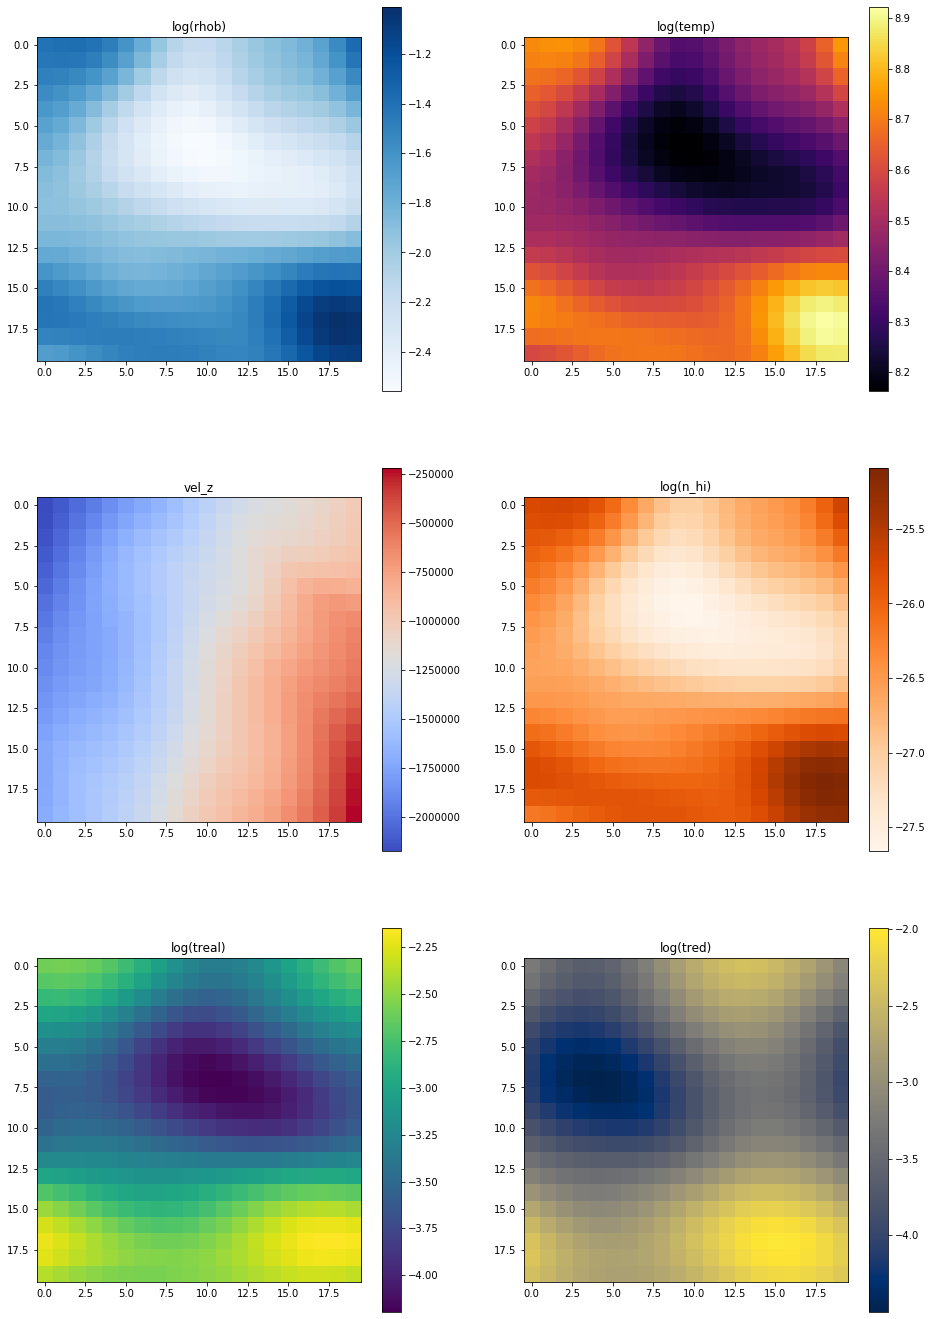

In [41]:
# plot the six slices
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob), cmap='Blues')
axes[0,0].set_title("log(rhob)")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp), cmap='inferno')
axes[0,1].set_title("log(temp)")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(vel, cmap='coolwarm')
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi), cmap='Oranges')
axes[1,1].set_title("log(n_hi)")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal), cmap='viridis')
axes[2,0].set_title("log(treal)")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred), cmap='cividis')
axes[2,1].set_title("log(tred)")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [42]:
# for 4x4x4, check that treal and tred don't have uniform rows
# print(treal)
# print(tred)

## Compare these results with Gimlet results

In [43]:
# h5_sim also contains the Gimlet-derived fields

treal_g = h5_sim['derived_fields']['tau_real'][inds]
tred_g = h5_sim['derived_fields']['tau_red'][inds]
n_hi_g = h5_sim['derived_fields']['HI_number_density'][inds]

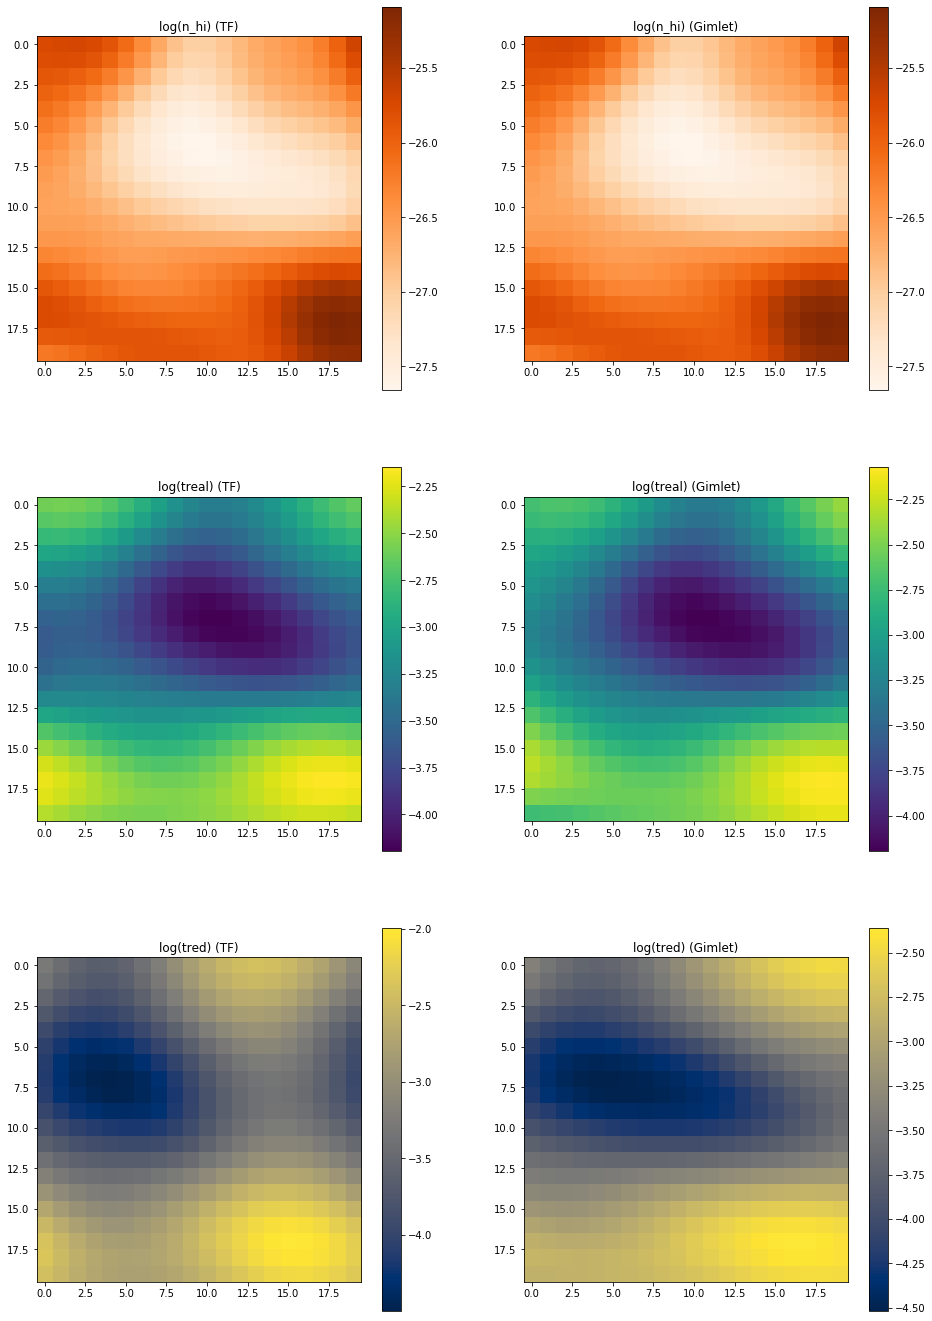

In [44]:
# plot the six slices 
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(n_hi), cmap='Oranges')
axes[0,0].set_title("log(n_hi) (TF)")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(n_hi_g), cmap='Oranges')
axes[0,1].set_title("log(n_hi) (Gimlet)")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(np.log(treal), cmap='viridis')
axes[1,0].set_title("log(treal) (TF)")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(treal_g), cmap='viridis')
axes[1,1].set_title("log(treal) (Gimlet)")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(tred), cmap='cividis')
axes[2,0].set_title("log(tred) (TF)")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred_g), cmap='cividis')
axes[2,1].set_title("log(tred) (Gimlet)")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

Using Symlog with imshow: https://stackoverflow.com/questions/11138706/colorbar-for-imshow-centered-on-0-and-with-symlog-scale

In [45]:
for i in range(-15, -17, -1):
    print(i)

-15
-16


In [46]:
def imshow_symlog(my_matrix, vmin, vmax, cmap, logthresh=5):
    plt.figure(figsize=(6,6))
    
    plt.imshow( my_matrix, cmap=cmap,
                vmin=float(vmin), vmax=float(vmax),
                norm=mpl.colors.SymLogNorm(10**-logthresh) )

    maxlog=int(np.ceil( np.log10(vmax) ))
    minlog=int(np.ceil( np.log10(-vmin) ))

    #generate logarithmic ticks 
    tick_locations=([-(10**x) for x in range(-logthresh, minlog - 2, -1)] # -16, -19, -1
                     +[0.0]
                     +[(10**x) for x in range(-logthresh, maxlog - 2, -1)] ) # -16, -19, -1
    #print(tick_locations)

    cbar = plt.colorbar(ticks=tick_locations)
    
    plt.title('n_hi_g - n_hi')
    #cbar.ax.set_yticklabels(np.log10(tick_locations))

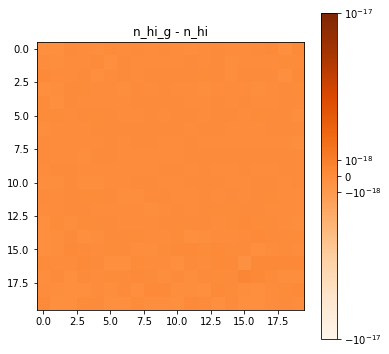

In [47]:
v = 1e-17

imshow_symlog(n_hi_g - n_hi, -v, v, cmap='Oranges', logthresh=16)

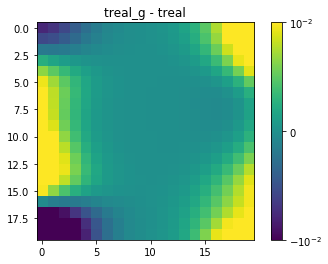

In [48]:
v = 1e-2
plt.imshow(treal_g - treal, cmap='viridis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('treal_g - treal')

plt.show()

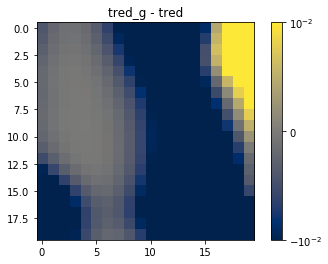

In [49]:
v = 1e-2
plt.imshow(tred_g - tred, cmap='cividis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('tred_g - tred')

plt.show()

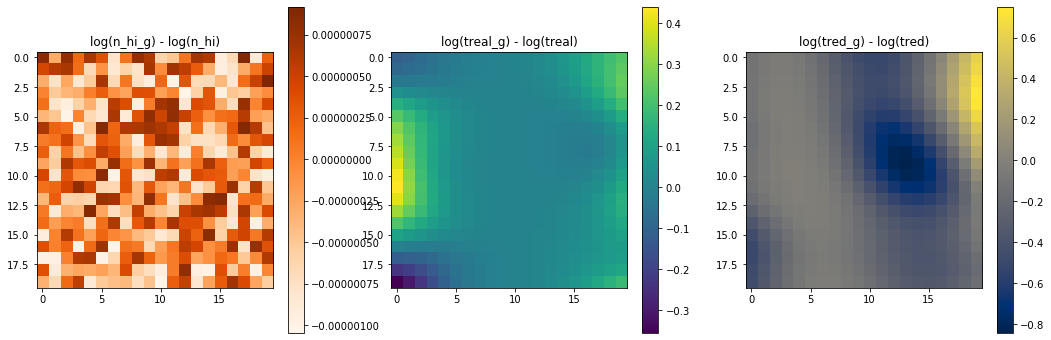

In [50]:
# plot "residuals" log(n_hi_g / n_hi)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

im1 = axes[0].imshow(np.log(n_hi_g) - np.log(n_hi), cmap='Oranges')
axes[0].set_title("log(n_hi_g) - log(n_hi)")
fig.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(np.log(treal_g) - np.log(treal), cmap='viridis')
axes[1].set_title("log(treal_g) - log(treal)")
fig.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(np.log(tred_g) - np.log(tred), cmap='cividis')
axes[2].set_title("log(tred_g) - log(tred)")
fig.colorbar(im3, ax=axes[2])

plt.show()

## Close HDF5 files

In [51]:
h5_sim.close()
h5_tf.close()